In [3]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 普通一维线性回归

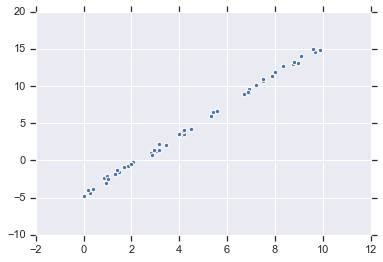

In [5]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x, y)

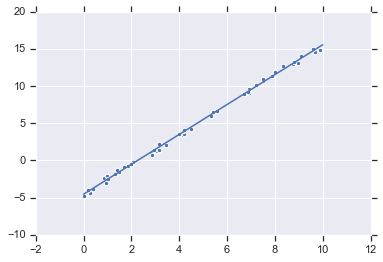

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
x_fit = np.linspace(0,10,1000)
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(x_fit, y_fit)
plt.scatter(x, y)

##### 斜率与截距

In [12]:
print('斜率为:  ', model.coef_[0])
print('截距为:  ', model.intercept_)

斜率为:   2.00823024323
截距为:   -4.5336529721


### 多元线性回归

In [14]:
x = rng.rand(100,3) * 10
y = np.dot(x, [1.5, -2., 1.]) + 0.5
model.fit(x, y)
print('斜率为:  ', model.coef_)
print('截距为:  ', model.intercept_)

斜率为:   [ 1.5 -2.   1. ]
截距为:   0.5


### 添加惩罚项的线性回归
*基函数的次数太高，添加惩罚项*

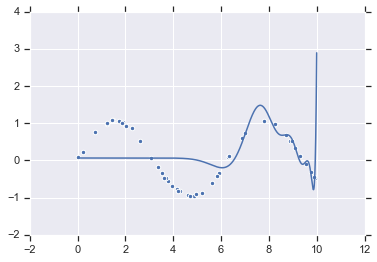

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
ploy_model = make_pipeline(PolynomialFeatures(30),
                         LinearRegression())
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.rand(50)
ploy_model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(x_fit, ploy_model.predict(x_fit[:, np.newaxis]))

**L2正则化，岭回归**

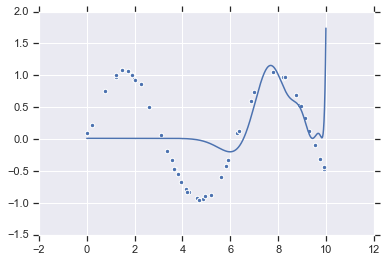

In [36]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(30),
                      Ridge(alpha=0.1))
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(x_fit, model.predict(x_fit[:, np.newaxis]))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


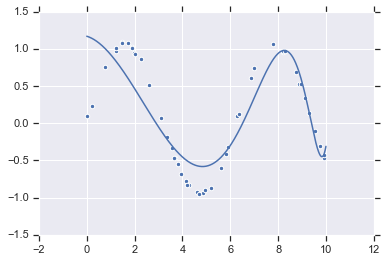

In [37]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(30),
                     Lasso(alpha=0.001))
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(x_fit, model.predict(x_fit[:, np.newaxis]))